{{ badge }}

**We do all the below techniques after preprocessing the data only**

#Feature Importance

* Refers to technique that assigns a score to input features based on how useful they are at predicting target variable.
* Many ways:
  * Statistical correlation scores
  * Coefficients calculated as part of:
    * Linear models
    * Decision trees
    * Permutation important scores
* F.I scores helps in predictive modelling:
  * **`Providing insight into data`**: <br>The relative scores can tells which feats are most relevant to the target and which are not.
  * **`Insight into model`**:<br> Most F.I scores are calculated by model itself that we are using for prediction. Inspecting such scores provides insight into that specific model and which feats are imp. and which are not to that specific model when making prediction.
  * **`Improve model`**:<br>Basis for dimensionality reduction, feature selection that can improve the efficiency and effectiveness of a predictive model on the problem. With the F.I scores can remove feat with lowest scores or keep that has highest scores to improve the performance of model.
  * **Better understanding of the data**
  * **Better understanding a model**
  * **Reducing the number of input features**
* F.I scores can be calculated for classification and regression problems.
* Simplest way to calculate **Simple Corr. Coefficients** between  each feat. and the target variable.
* To know which method to use for feature selection refer **Choosing Feat. selection method** notebook.

> * Advanced feature importance techniques:
  * F.I from model coefficients
  * F.I from Decision Trees
  * F.I from permutation testing.

In [ ]:
import sklearn
print(sklearn.__version__)

0.22.2.post1


**Test Datsets**<br>
Each test problem we are going to use has 5 important and 5 unimportant features. We see which methods are good at finding the features based on their importance.

**Classification Dataset**

In [ ]:
#test classifiction dataset
from sklearn.datasets import make_classification

#n_informative : imp features
#n_redundant : unimp features
X_c,y_c = make_classification(n_samples=1000,
                          n_features = 10,
                          n_informative = 5,
                          n_redundant = 5,
                          random_state=1)
print(X_c.shape, y_c.shape)

(1000, 10) (1000,)


**Regression Dataset**

In [ ]:
from sklearn.datasets import make_regression

X_r,y_r = make_regression(n_samples = 1000,
                      n_features = 10,
                      n_informative = 5,
                      random_state = 1)
print(X_r.shape, y_r.shape)

(1000, 10) (1000,)


##Coefficients as Feature Importance

* Linear machine learning algorithms fit a model where prediction is the weighted sum of input values.
* Examples are : 
<br>Linear regression (finding coefficients of a line/plane)
<br>Logistic regression (finding coefficients of W plane/line)
<br>Elastic net
<br> Ridge regression
* All the above algos finds coefficients of decision surface to make prediction. We use these coefficients directly as F.I scores.

**Steps**
* Fit a model on the dataset to find coefficients
* Summarize the F.I scores for each input feature
* Plotting the scores to get relative importance of feats.

###Linear Regression F.I

* Fit Linear Regression model on regression dataset
* Get the coefficients of features from **`coef_`** that contains coefficients of each feature.
* Standardise the data before applying Lr Reg. or proceed if the input variables have the same scale.

Feature : 0, Score : -0.00000
Feature : 1, Score : 12.44483
Feature : 2, Score : -0.00000
Feature : 3, Score : -0.00000
Feature : 4, Score : 93.32225
Feature : 5, Score : 86.50811
Feature : 6, Score : 26.74607
Feature : 7, Score : 3.28535
Feature : 8, Score : -0.00000
Feature : 9, Score : 0.00000


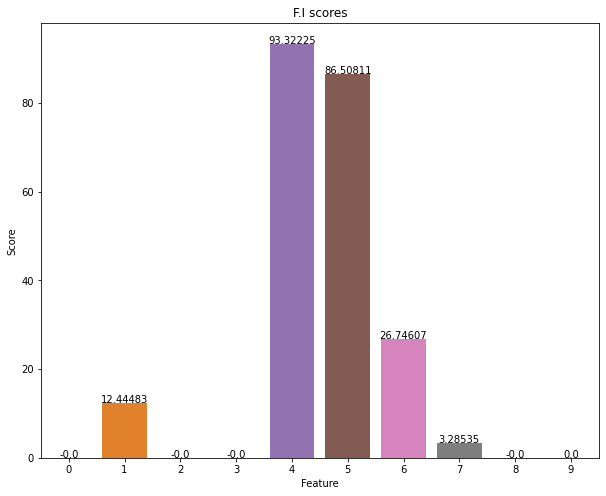

In [ ]:
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
import pandas.util.testing as tm
import matplotlib.pyplot as plt
import seaborn as sns

X,y = make_regression(n_samples=1000,
                      n_features = 10,
                      n_informative = 5,
                      random_state = 1)

model = LinearRegression()
model.fit(X,y)

#get F.I scores
FI_scores = model.coef_

#summarize F.I scores
for i,v in enumerate(FI_scores):
  print('Feature : %0d, Score : %.5f' % (i,v))

#plot F.I scores
f,ax = plt.subplots(figsize=(10,8))
sns.barplot(x = [x for x in range(len(FI_scores))], y=FI_scores)

for i,score in enumerate(FI_scores):
  ax.text(i,score,round(score,5),horizontalalignment='center', fontsize=10)

plt.xlabel('Feature')
plt.ylabel('Score')
plt.title('F.I scores')
plt.show()


* Above same method can be used for Ridge and ElasticNet models.

###Logistic Regression F.I

* Fit Logistict Regression model on classificatio dataset
* Get the coefficients of features from **`coef_`** that contains coefficients of each feature.
* Standardise the data before applying Lr Reg. or proceed if the input variables have the same scale.

Feature : 0, Score : 0.16320
Feature : 1, Score : -0.64301
Feature : 2, Score : 0.48497
Feature : 3, Score : -0.46190
Feature : 4, Score : 0.18432
Feature : 5, Score : -0.11978
Feature : 6, Score : -0.40602
Feature : 7, Score : 0.03772
Feature : 8, Score : -0.51785
Feature : 9, Score : 0.26540


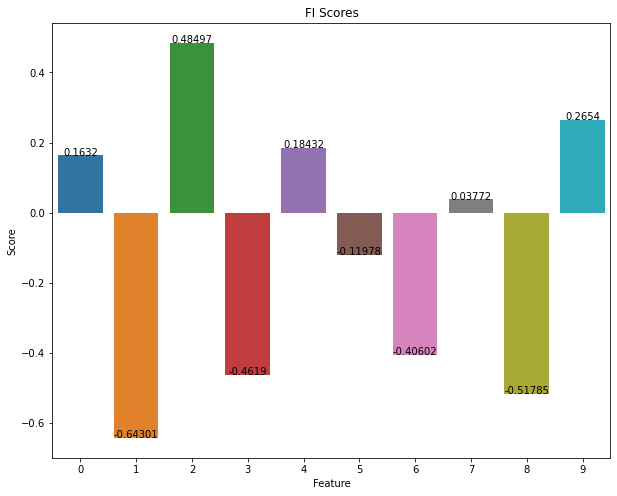

In [ ]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
import seaborn as sns
import matplotlib.pyplot as plt

#Default classes are 0,1 (two classes)
X,y = make_classification(n_samples=1000,
                          n_features = 10,
                          n_informative = 5,
                          n_redundant = 5,
                          random_state = 1)

model = LogisticRegression()
model.fit(X,y)

#F.I Scores
#shape for coef_ in classificatio is (feats,) i.e 2D
#so we use coef_[0]
FI_scores = model.coef_[0]

#Printing the scores
for i,v in enumerate(FI_scores):
  print('Feature : %0d, Score : %.5f' %(i,v))

#Plotting
f,ax = plt.subplots(figsize=(10,8))

sns.barplot(x=[i for i in range(len(FI_scores))], y=FI_scores)

#markers
for ft,score in enumerate(FI_scores):
  ax.text(ft,score,round(score,5),fontsize=10, horizontalalignment='center')

plt.xlabel('Feature')
plt.ylabel('Score')
plt.title('FI Scores')
plt.show()

* As this is classification two xlasses exists 0,1.
* coef_[0] - coefficients for class 0
* coef_[1] - coefficients for class 1
* Scores are both +ve, -ve. +ve for class 1, -ve for class 0.
* No exact clear pattern is seen for detecting imp and unimp feats. from the above results.

In [ ]:
FI_scores.shape

(10,)

##Decision Tree F.I
* DT algorithms like CART (Classification and Regression Trees), provide FI scores based on reduction in criterion used to select split points, like **`Gini or Entropy`**.
* The same approach can be used for ensembles of DT : Random forest and stochastic gradient boosting algorithms.

###CART (normal DT algo) F.I
* This can be implemented using models
  * DecisionTreeRegressor
  * DecisionTreeClassifier clases in sklearn

**Steps**
* Fit the model
* Get FI scores using property feature_importances_
* Plot the scores

####CART Regression FI

Feature : 0, Score : 0.00260
Feature : 1, Score : 0.00414
Feature : 2, Score : 0.00260
Feature : 3, Score : 0.00183
Feature : 4, Score : 0.51702
Feature : 5, Score : 0.43773
Feature : 6, Score : 0.02733
Feature : 7, Score : 0.00306
Feature : 8, Score : 0.00258
Feature : 9, Score : 0.00111


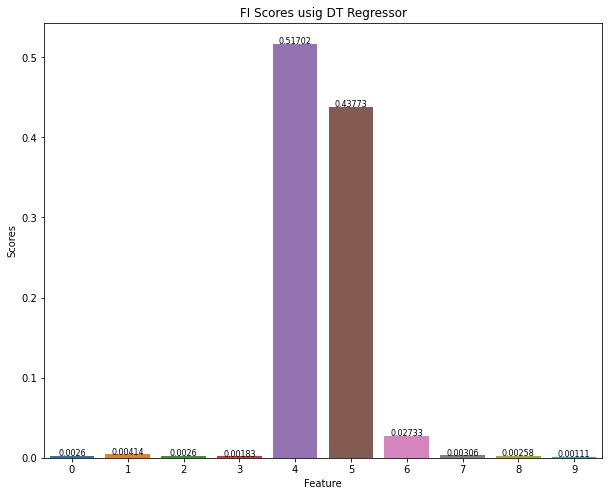

In [ ]:
from sklearn.datasets import make_regression
from sklearn.tree import DecisionTreeRegressor
import seaborn as sns
import matplotlib.pyplot as plt

X,y = make_regression(n_samples = 1000,
                      n_features = 10,
                      n_informative = 5,
                      random_state = 1)

model = DecisionTreeRegressor()
model.fit(X,y)

FI_scores = model.feature_importances_

#printing scores
for i,v in enumerate(FI_scores):
  print('Feature : %0d, Score : %0.5f' %(i,v))

#plotting
f, ax = plt.subplots(figsize=(10,8))

sns.barplot(x=[i for i in range(len(FI_scores))], y=FI_scores)

for ft,score in enumerate(FI_scores):
  ax.text(ft,score,round(score,5),fontsize=8, horizontalalignment='center')

plt.xlabel('Feature')
plt.ylabel('Scores')
plt.title('FI Scores usig DT Regressor')
plt.show()

####CART Classification FI

Feature : 0, Score : 0.02576
Feature : 1, Score : 0.01433
Feature : 2, Score : 0.18331
Feature : 3, Score : 0.30540
Feature : 4, Score : 0.08637
Feature : 5, Score : 0.00285
Feature : 6, Score : 0.16305
Feature : 7, Score : 0.04329
Feature : 8, Score : 0.12818
Feature : 9, Score : 0.04746


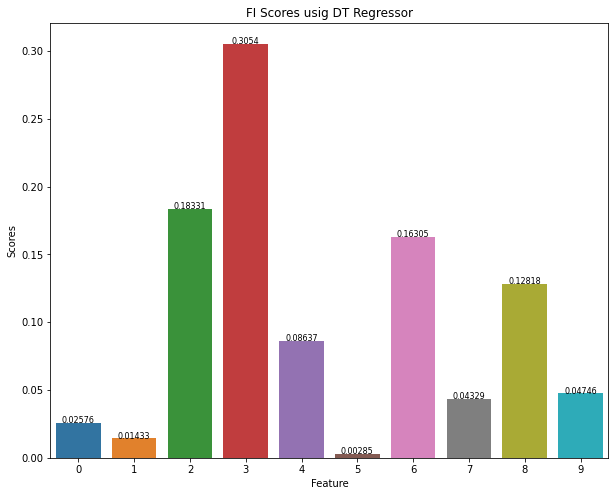

In [ ]:
from sklearn.datasets import make_classification
from sklearn.tree import DecisionTreeClassifier
import seaborn as sns
import matplotlib.pyplot as plt

X,y = make_classification(n_samples=1000,
                          n_features=10,
                          n_informative=5,
                          n_redundant = 5,
                          random_state=1)
model = DecisionTreeClassifier()
model.fit(X,y)

#FI scores
FI_scores = model.feature_importances_

#printing FI scores
for i,v in enumerate(FI_scores):
  print('Feature : %0d, Score : %0.5f'%(i,v))

#plotting
f, ax = plt.subplots(figsize=(10,8))

sns.barplot(x=[i for i in range(len(FI_scores))], y=FI_scores)

for ft,score in enumerate(FI_scores):
  ax.text(ft,score,round(score,5),fontsize=8, horizontalalignment='center')

plt.xlabel('Feature')
plt.ylabel('Scores')
plt.title('FI Scores usig DT Regressor')
plt.show()

##Random Forest FI
* This can be implemented using models
  * RandomForestRegressor
  * RandomForestClassifier clases in sklearn

**Steps**
* Fit the model
* Get FI scores using property feature_importances_
* Plot the scores

* This approach can be used with baging and extra trees algorithms

####Random Forest Regression FI

Feature : 0, Score : 0.00303
Feature : 1, Score : 0.00538
Feature : 2, Score : 0.00275
Feature : 3, Score : 0.00263
Feature : 4, Score : 0.52955
Feature : 5, Score : 0.42093
Feature : 6, Score : 0.02671
Feature : 7, Score : 0.00309
Feature : 8, Score : 0.00309
Feature : 9, Score : 0.00284


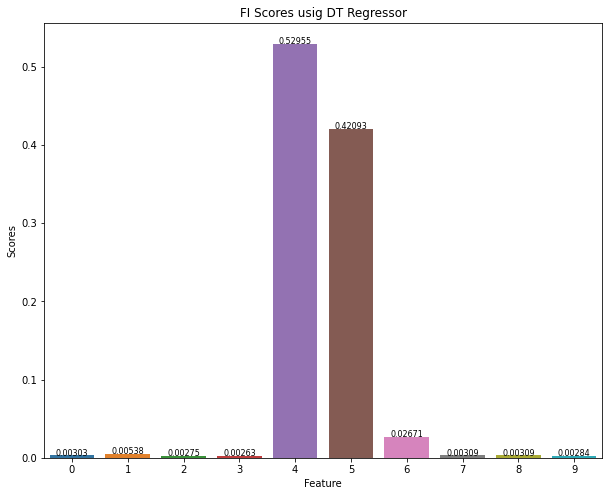

In [ ]:
from sklearn.datasets import make_regression
from sklearn.ensemble import RandomForestRegressor
import seaborn as sns
import matplotlib.pyplot as plt

X,y = make_regression(n_samples=1000,
                          n_features=10,
                          n_informative=5,
                          random_state=1)
model = RandomForestRegressor()
model.fit(X,y)

#FI scores
FI_scores = model.feature_importances_

#printing FI scores
for i,v in enumerate(FI_scores):
  print('Feature : %0d, Score : %0.5f'%(i,v))

#plotting
f, ax = plt.subplots(figsize=(10,8))

sns.barplot(x=[i for i in range(len(FI_scores))], y=FI_scores)

for ft,score in enumerate(FI_scores):
  ax.text(ft,score,round(score,5),fontsize=8, horizontalalignment='center')

plt.xlabel('Feature')
plt.ylabel('Scores')
plt.title('FI Scores usig DT Regressor')
plt.show()

####Random Forest Classification FI

Feature : 0, Score : 0.06364
Feature : 1, Score : 0.11046
Feature : 2, Score : 0.15556
Feature : 3, Score : 0.19803
Feature : 4, Score : 0.07603
Feature : 5, Score : 0.11094
Feature : 6, Score : 0.10009
Feature : 7, Score : 0.04770
Feature : 8, Score : 0.09506
Feature : 9, Score : 0.04250


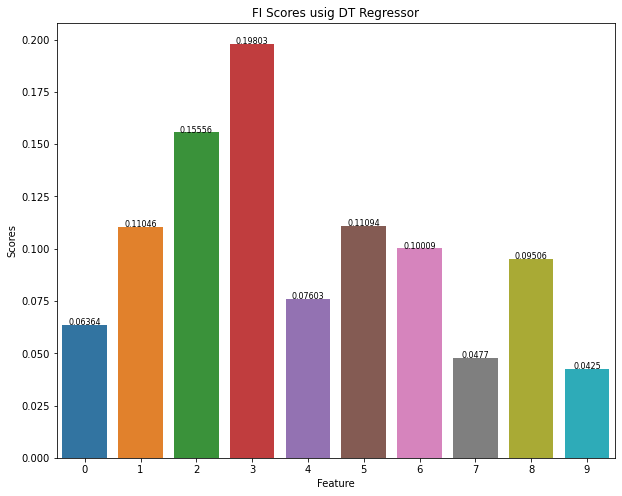

In [ ]:
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
import matplotlib.pyplot as plt

X,y = make_classification(n_samples=1000,
                          n_features=10,
                          n_informative=5,
                          n_redundant = 5,
                          random_state=1)
model = RandomForestClassifier()
model.fit(X,y)

#FI scores
FI_scores = model.feature_importances_

#printing FI scores
for i,v in enumerate(FI_scores):
  print('Feature : %0d, Score : %0.5f'%(i,v))

#plotting
f, ax = plt.subplots(figsize=(10,8))

sns.barplot(x=[i for i in range(len(FI_scores))], y=FI_scores)

for ft,score in enumerate(FI_scores):
  ax.text(ft,score,round(score,5),fontsize=8, horizontalalignment='center')

plt.xlabel('Feature')
plt.ylabel('Scores')
plt.title('FI Scores usig DT Regressor')
plt.show()

##XGBoost FI
* XGBoost library provides efficient and effective implementation of stochastic gradient boosting algorithm.
* This can be implemented using models
  * XGBRegressor
  * XGBClassifier clases in sklearn

* Above can also be available as :
  * GradientBoostingClassifier
  * GradientBoostingRegressor

**Steps**
* Fit the model
* Get FI scores using property **`feature_importances_`**
* Plot the scores

* This approach can be used with baging and extra trees algorithms

In [ ]:
import xgboost
print(xgboost.__version__)

0.90


####XGBoost Regression FI

[09:03:33] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Feature : 0, Score : 0.00060
Feature : 1, Score : 0.01917
Feature : 2, Score : 0.00091
Feature : 3, Score : 0.00118
Feature : 4, Score : 0.49380
Feature : 5, Score : 0.42342
Feature : 6, Score : 0.05057
Feature : 7, Score : 0.00419
Feature : 8, Score : 0.00124
Feature : 9, Score : 0.00491


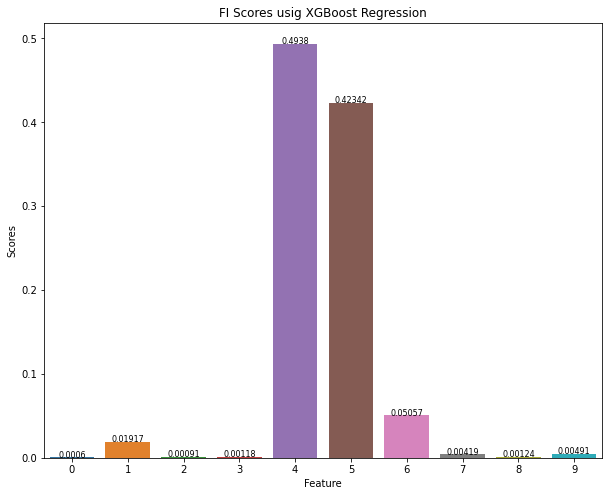

In [ ]:
from sklearn.datasets import make_regression
from xgboost import XGBRegressor
import seaborn as sns
import matplotlib.pyplot as plt

X,y = make_regression(n_samples=1000,
                          n_features=10,
                          n_informative=5,
                          random_state=1)
model = XGBRegressor()
model.fit(X,y)

#FI scores
FI_scores = model.feature_importances_

#printing FI scores
for i,v in enumerate(FI_scores):
  print('Feature : %0d, Score : %0.5f'%(i,v))

#plotting
f, ax = plt.subplots(figsize=(10,8))

sns.barplot(x=[i for i in range(len(FI_scores))], y=FI_scores)

for ft,score in enumerate(FI_scores):
  ax.text(ft,score,round(score,5),fontsize=8, horizontalalignment='center')

plt.xlabel('Feature')
plt.ylabel('Scores')
plt.title('FI Scores usig XGBoost Regression')
plt.show()

####XGoost Classification FI

Feature : 0, Score : 0.02464
Feature : 1, Score : 0.08153
Feature : 2, Score : 0.12516
Feature : 3, Score : 0.28400
Feature : 4, Score : 0.12694
Feature : 5, Score : 0.10752
Feature : 6, Score : 0.08624
Feature : 7, Score : 0.04820
Feature : 8, Score : 0.09357
Feature : 9, Score : 0.02220


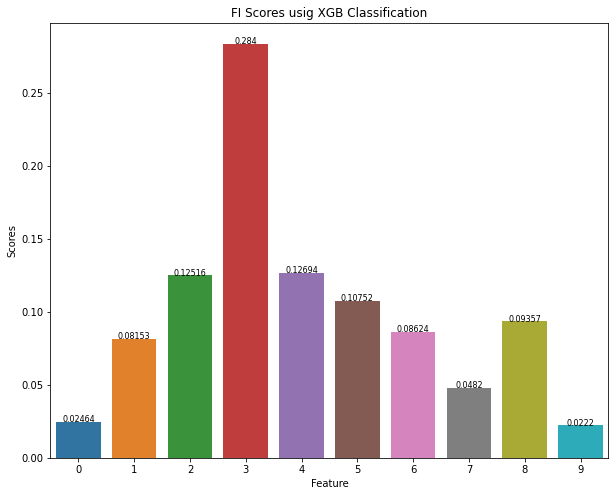

In [ ]:
from sklearn.datasets import make_classification
from xgboost import XGBClassifier
import seaborn as sns
import matplotlib.pyplot as plt

X,y = make_classification(n_samples=1000,
                          n_features=10,
                          n_informative=5,
                          n_redundant = 5,
                          random_state=1)
model = XGBClassifier()
model.fit(X,y)

#FI scores
FI_scores = model.feature_importances_

#printing FI scores
for i,v in enumerate(FI_scores):
  print('Feature : %0d, Score : %0.5f'%(i,v))

#plotting
f, ax = plt.subplots(figsize=(10,8))

sns.barplot(x=[i for i in range(len(FI_scores))], y=FI_scores)

for ft,score in enumerate(FI_scores):
  ax.text(ft,score,round(score,5),fontsize=8, horizontalalignment='center')

plt.xlabel('Feature')
plt.ylabel('Scores')
plt.title('FI Scores usig XGB Classification')
plt.show()

* **From above we can see that CART Regression, RandomForest Regression, XGBRession gives same result that feature 4, 5 are most important.**
* **RandomForest Classification, XG Classification gives same results**

## Forward feature selection or Permutation FI
* Technique for calculating relative importance scores independent of model used.
* In this, we use a model that doesn't give FI scores implicitly such as KNN algo.
* **Check theory of forward feature selection.**
* This approach can be used for regression or classification and **evaluation metric** is used as basis of FI score.
  * Mean square error for regression
  * Accuracy for classification
* Permutation FI can be used using **`permutation_importance()`** that takes fit_model,scorint function as inputs.

### Permutation FI for Regression
* Using KNN

Feature : 0, Score : 182.92293
Feature : 1, Score : 363.86907
Feature : 2, Score : 156.13718
Feature : 3, Score : 88.24631
Feature : 4, Score : 9605.28763
Feature : 5, Score : 8063.68082
Feature : 6, Score : 897.18383
Feature : 7, Score : 149.61377
Feature : 8, Score : 108.99175
Feature : 9, Score : 85.98160


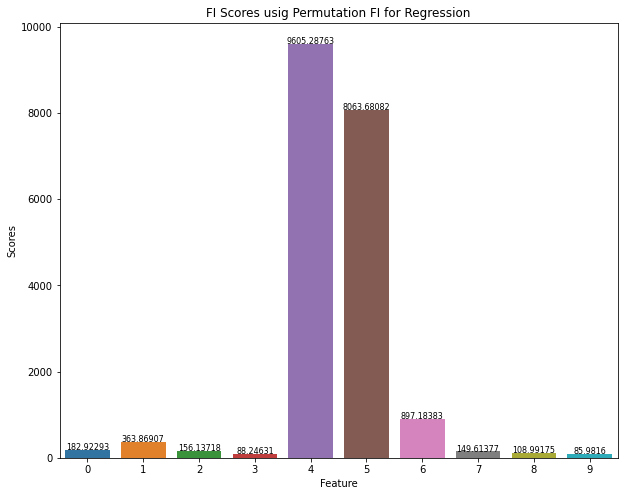

In [ ]:
from sklearn.datasets import make_regression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.inspection import permutation_importance
import seaborn as sns
import matplotlib.pyplot as plt

X,y = make_regression(n_samples=1000,
                      n_features=10,
                      n_informative=5,
                      random_state=1)
model = KNeighborsRegressor()
model.fit(X,y)

#getting scores from permutation_importance
results = permutation_importance(model, X, y, scoring='neg_mean_squared_error')

FI_scores = results.importances_mean

#printing FI scores
for i,v in enumerate(FI_scores):
  print('Feature : %0d, Score : %0.5f'%(i,v))

#plotting
f, ax = plt.subplots(figsize=(10,8))

sns.barplot(x=[i for i in range(len(FI_scores))], y=FI_scores)

for ft,score in enumerate(FI_scores):
  ax.text(ft,score,round(score,5),fontsize=8, horizontalalignment='center')

plt.xlabel('Feature')
plt.ylabel('Scores')
plt.title('FI Scores usig Permutation FI for Regression')
plt.show()

### Permutation FI for Classification
* Using KNN
* Before using this technique for classification make sure the data is balanced as we are using accuracy as evaluation metric for finding FI scores.
* But other evaluation metrics also used. Check beow link: <br>
https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter

Feature : 0, Score : 0.04720
Feature : 1, Score : 0.06560
Feature : 2, Score : 0.04940
Feature : 3, Score : 0.09100
Feature : 4, Score : 0.04920
Feature : 5, Score : 0.05900
Feature : 6, Score : 0.07480
Feature : 7, Score : 0.05020
Feature : 8, Score : 0.04840
Feature : 9, Score : 0.03060


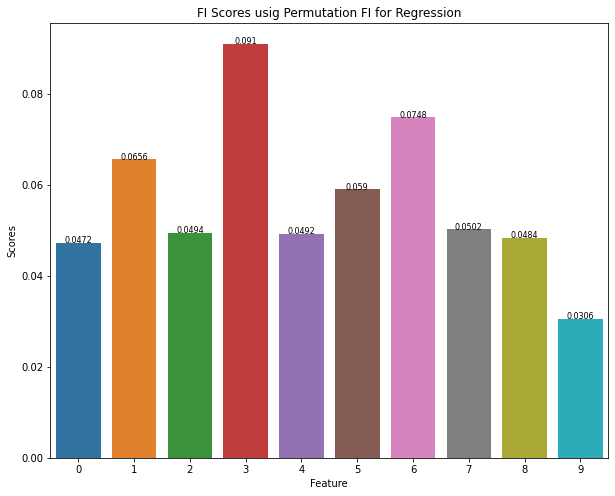

In [ ]:
from sklearn.datasets import make_classification
from sklearn.neighbors import KNeighborsClassifier
from sklearn.inspection import permutation_importance
import seaborn as sns
import matplotlib.pyplot as plt

X,y = make_classification(n_samples=1000,
                      n_features=10,
                      n_informative=5,
                      n_redundant = 5,
                      random_state=1)
model = KNeighborsClassifier()
model.fit(X,y)

#getting scores from permutation_importance
results = permutation_importance(model, X, y, scoring='accuracy')

FI_scores = results.importances_mean

#printing FI scores
for i,v in enumerate(FI_scores):
  print('Feature : %0d, Score : %0.5f'%(i,v))

#plotting
f, ax = plt.subplots(figsize=(10,8))

sns.barplot(x=[i for i in range(len(FI_scores))], y=FI_scores)

for ft,score in enumerate(FI_scores):
  ax.text(ft,score,round(score,5),fontsize=8, horizontalalignment='center')

plt.xlabel('Feature')
plt.ylabel('Scores')
plt.title('FI Scores usig Permutation FI for Regression')
plt.show()